#### Module 10: Unsupervised Learning

#### Case Study – 1

Domain –Automotive

focus – Incentivize drivers

Business challenge/requirement

Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on the driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driving per day, etc. You as an ML expert have to create a cluster model where drivers can be grouped
based on the driving data.

Key issues

Drivers will be incentivized based on the cluster, so grouping has to be accurate 

Data volume

- 4000 records – file driver-data.csv
  
Fields in Data

• id: Unique Id of the driver

• mean_dist_day: Mean distance driven by driver per day

• mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

Additional information

- NA
  
Business benefits

Increase in profits, up to 15-20% as drivers with poor history will be charged more

Cluster Centers (original scale):
 [[ 50.01663663   5.20403749]
 [180.43486331  10.5294964 ]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]


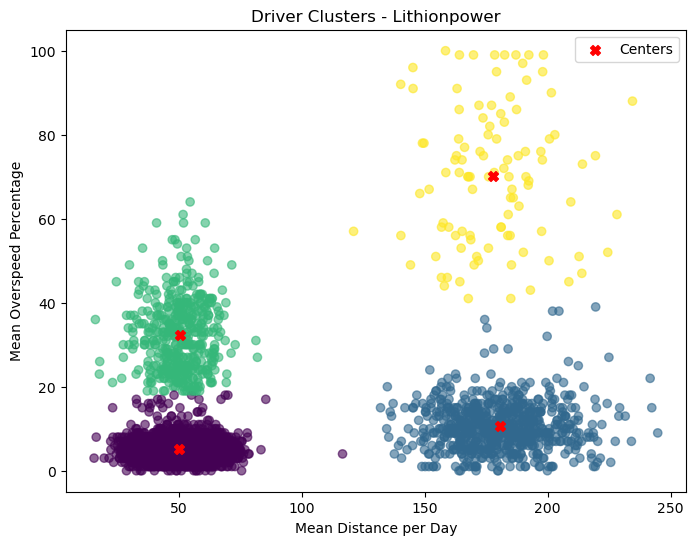

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("driver-data.csv")

#  Select features
X = df[['mean_dist_day', 'mean_over_speed_perc']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
# Start with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):\n", centers)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], 
            c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=50, label='Centers')
plt.xlabel("Mean Distance per Day")
plt.ylabel("Mean Overspeed Percentage")
plt.title("Driver Clusters - Lithionpower")
plt.legend()
plt.show()
